**1. Presentation and general preparation of the Titanic data set**

The data set contains the data of 888 people who were on the Titanic when the disaster occurred.

Column names and types:

Survived: takes a value of 0 or 1, based on whether the person survived the disaster or not --> int64

Pclass: can take a value of 1, 2 or 3, based on the class the person traveled in --> int64

Name: contains the name of the given person --> object (string)

Sex: male or female. Gender of person --> object (string)

Age: person's age --> float64

Siblings/Spouses Aboard: shows how many siblings the given person has on board or whether they are traveling with a spouse --> int64

Parents/Children Aboard: shows how many of the person's parents/children are on board -->i nt64

Fare: how much did you pay for the ticket --> float64

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.tree import plot_tree

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
titanic = pd.read_excel('/content/drive/MyDrive/datasets/Titanic.xlsx')

titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [5]:
#drop name column
titanic.drop(labels='Name', axis=1, inplace=True)

# Convert the Sex column into a dummy variable (with reference coding)
titanic['Sex'] = pd.get_dummies(titanic['Sex'], drop_first=True)

titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


## **2. Preparing the Titanic dataset for classification**

In [6]:
classlabel = list(titanic.columns[:1])
features = list(titanic.columns[1:])

print("Classlabels:", classlabel, "\n")
print("Features:", features)

Classlabels: ['Survived'] 

Features: ['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']


In [8]:
# DataFrame is divided into PROPERTIES(features, X) and TARGET(target, y) arrays
X = titanic.iloc[:, 1:].values
y = titanic.iloc[:, 0].values.reshape(-1,1)

print(X)
print(y)

[[ 3.      1.     22.      1.      0.      7.25  ]
 [ 1.      0.     38.      1.      0.     71.2833]
 [ 3.      0.     26.      0.      0.      7.925 ]
 ...
 [ 3.      0.      7.      1.      2.     23.45  ]
 [ 1.      1.     26.      0.      0.     30.    ]
 [ 3.      1.     32.      0.      0.      7.75  ]]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0

In [9]:
# Create training and test data with 2/3 and 1/3 cuts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [10]:
# Scale input data to the [0,1] range
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**3. Models**

Decision trees
Decision trees can be implemented using the DecisionTreeClassifier class.

In [11]:
#creating new classifyer
clf_dtree = DecisionTreeClassifier()
print(clf_dtree)

DecisionTreeClassifier()


In [12]:
#fitting the model
clf_dtree = clf_dtree.fit(X_train,y_train)

In [13]:
#using the model for the class label of the test dataset:
# Using the fitted model on the test data
y_pred_dtree = clf_dtree.predict(X_test)
y_pred_dtree

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0])

In [14]:
# Evaluation of the accuracy of the model on the test data
print("Accuracy without parameters:",clf_dtree.score(X_test, y_test))

Accuracy without parameters: 0.8054607508532423


Evaluation

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Sensitivity:", recall_score(y_test, y_pred_dtree))
print("Specificity:", recall_score(y_test, y_pred_dtree, pos_label=0))
print("F1:", f1_score(y_test, y_pred_dtree))
print("AUC:", roc_auc_score(y_test, y_pred_dtree))

Accuracy: 0.8054607508532423
Sensitivity: 0.7610619469026548
Specificity: 0.8333333333333334
F1: 0.7510917030567684
AUC: 0.797197640117994


In [16]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       180
           1       0.74      0.76      0.75       113

    accuracy                           0.81       293
   macro avg       0.79      0.80      0.80       293
weighted avg       0.81      0.81      0.81       293



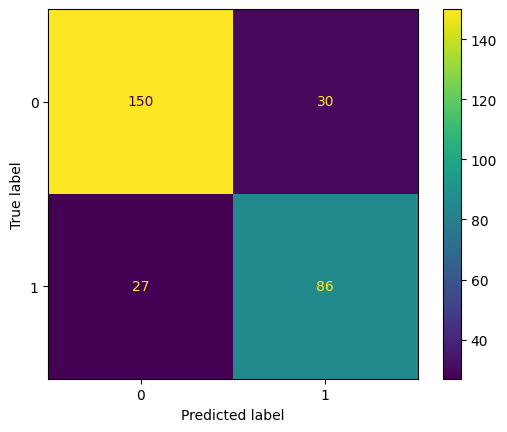

In [17]:
#Listing of the mixing matrix for the parametric model:
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtree)
disp.plot()

In [18]:
#Creation and evaluation of a parameterized decision tree:
clf_dtree2 = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10)
clf_dtree2 = clf_dtree2.fit(X_train,y_train)
print("Accuracy:",clf_dtree2.score(X_test, y_test))

Accuracy: 0.8191126279863481


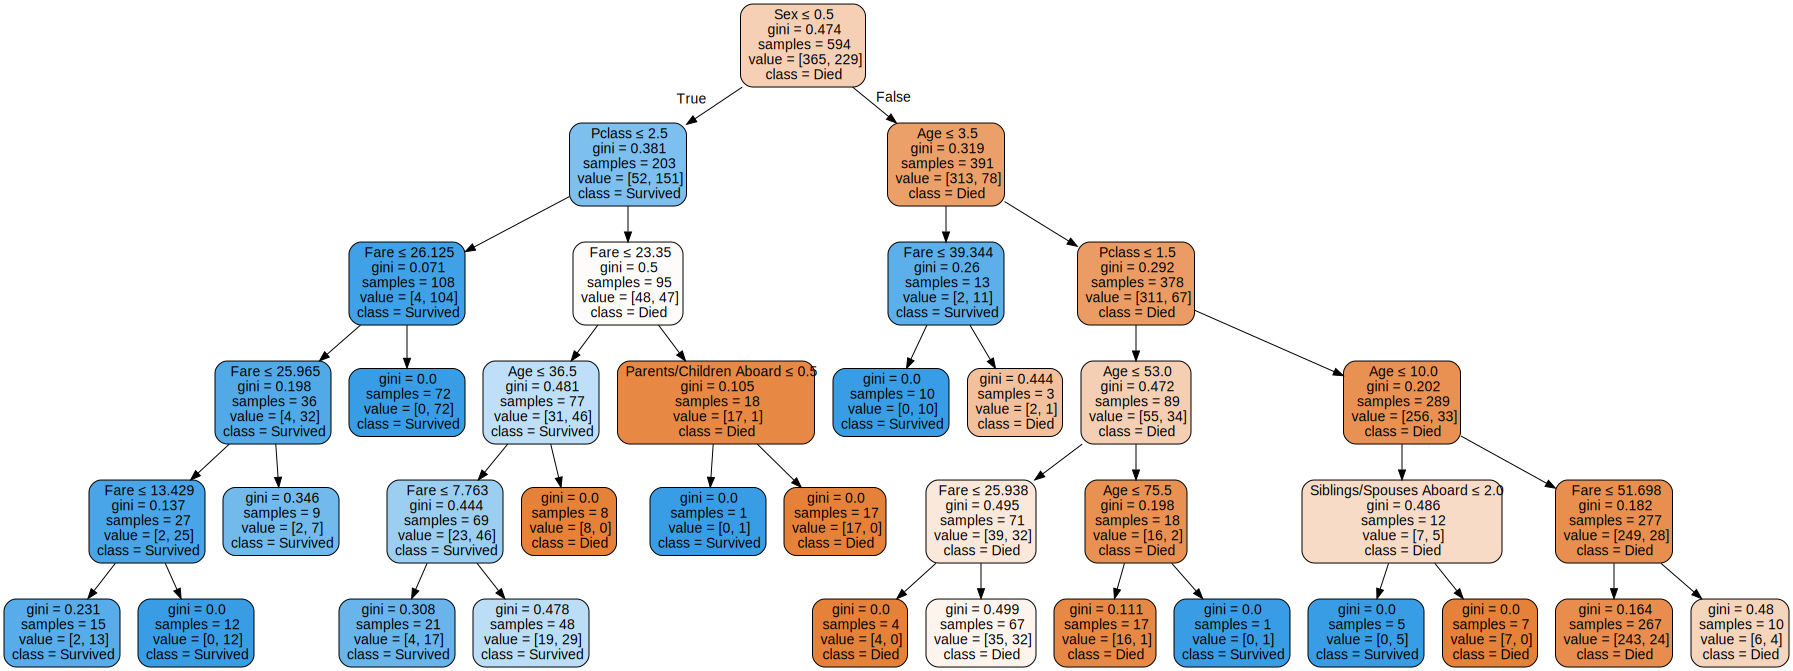

In [19]:
dot_data = export_graphviz(clf_dtree2, out_file=None,
                      feature_names=features,
                      class_names=["Died", "Survived"],
                      filled=True,
                      rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

Naive Bayes classifier

In [20]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [21]:
# prediction of labels
y_pred_gnb = clf_gnb.predict(X_test)
print(y_pred_gnb)

[1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0]


In [22]:

print("Accuracy:", clf_gnb.score(X_test,y_test))

Accuracy: 0.8020477815699659


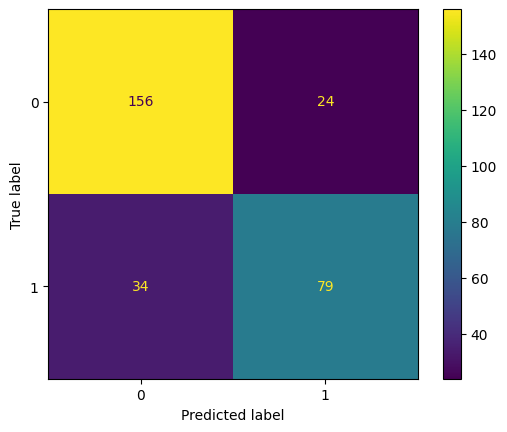

In [23]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gnb)
disp.plot()

In [24]:
#Let's see if the accuracy of the classification changes if we specify prior probabilities for retention in the classes!
model_gnb1 = GaussianNB(priors=[0.20, 0.80])
model_gnb1 = model_gnb1.fit(X_train, y_train.ravel())
print( model_gnb1.score(X_test,y_test))

0.7474402730375427


K-neighbor


In [25]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_scaled, y_train.ravel())

KNeighborsClassifier()

In [28]:
y_pred_knn = clf_knn.predict(X_test_scaled)
print(y_pred_knn)

[1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1
 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1
 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0]


In [29]:
print("Accuracy:", clf_knn.score(X_test_scaled,y_test))

Accuracy: 0.8054607508532423


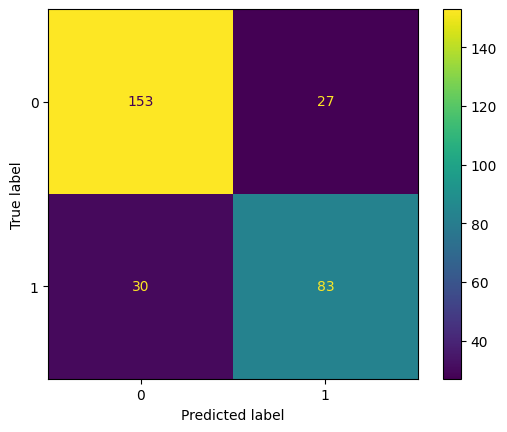

In [30]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()

Support Vector classifier

In [31]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train.ravel())

SVC()

In [32]:
y_pred_svm = clf_svm.predict(X_test)
print(y_pred_svm)

[0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1]


In [33]:
print("Accuracy:", clf_svm.score(X_test,y_test))

Accuracy: 0.6689419795221843


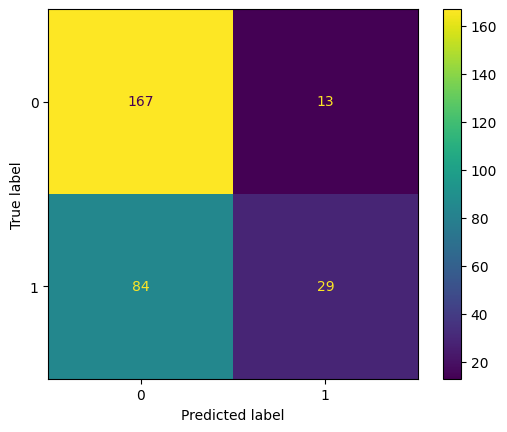

In [34]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()

Logistic Regression

In [35]:

clf_logreg = LogisticRegression(max_iter=200)


clf_logreg.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=200)

In [36]:
y_pred_logreg = clf_logreg.predict(X_test)
print(y_pred_logreg)

print("Accuracy:", clf_logreg.score(X_test,y_test))

[1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0
 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1
 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0]
Accuracy: 0.8020477815699659


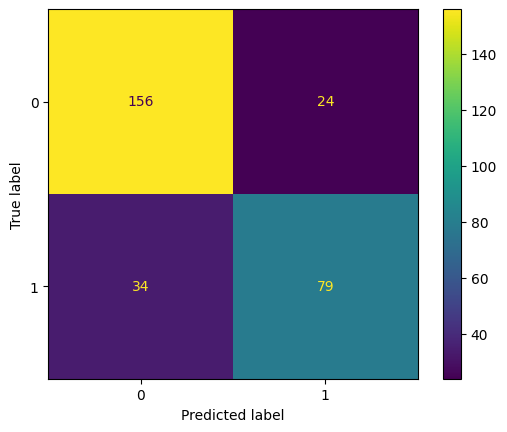

In [37]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp.plot()

 MLPClassifier

In [38]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train_scaled, y_train.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [39]:
y_pred_nn = clf_nn.predict(X_test_scaled)
print(y_pred_nn)

[1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1
 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0]


In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Sensitivity:", recall_score(y_test, y_pred_nn))
print("Specificity:", recall_score(y_test, y_pred_nn, pos_label=0))
print("F1:", f1_score(y_test, y_pred_nn))
print("AUC:", roc_auc_score(y_test, y_pred_nn))

print(classification_report(y_true=y_test, y_pred=y_pred_nn))

Accuracy: 0.8191126279863481
Sensitivity: 0.6814159292035398
Specificity: 0.9055555555555556
F1: 0.7439613526570049
AUC: 0.7934857423795476
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       180
           1       0.82      0.68      0.74       113

    accuracy                           0.82       293
   macro avg       0.82      0.79      0.80       293
weighted avg       0.82      0.82      0.82       293



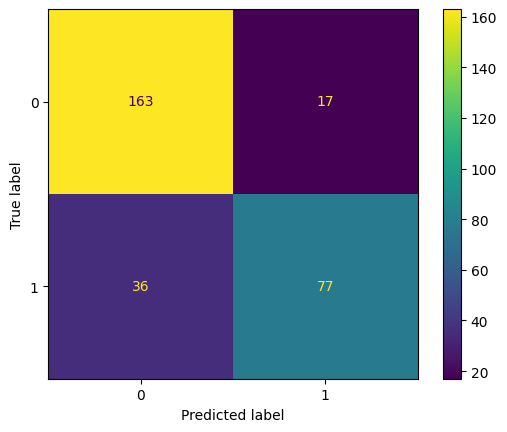

In [41]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp.plot()

Accuracy: 0.8156996587030717
Sensitivity: 0.672566371681416
Specificity: 0.9055555555555556
F1: 0.7378640776699029
AUC: 0.7890609636184859


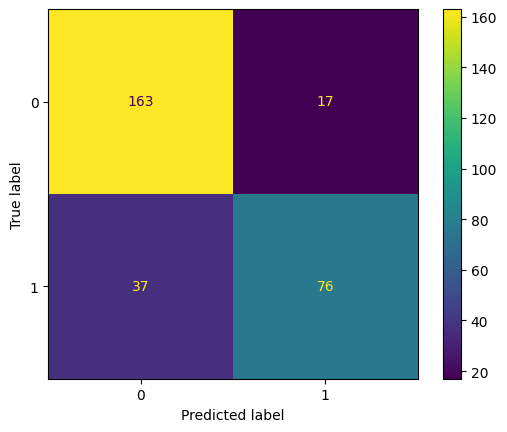

In [42]:
#Let's try to build the best possible model by tuning the parameters of the neural network!:
clf_nn2 = MLPClassifier(
                    hidden_layer_sizes=(4,4),
                    activation='relu',
                    solver='lbfgs',
                    max_iter=1000,
                    alpha=0.001,
                    random_state=0)

clf_nn2.fit(X_train_scaled, y_train.ravel())
y_pred_nn2 = clf_nn2.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_nn2))
print("Sensitivity:", recall_score(y_test,y_pred_nn2))
print("Specificity:", recall_score(y_test, y_pred_nn2, pos_label=0))
print("F1:", f1_score(y_test, y_pred_nn2))
print("AUC:", roc_auc_score(y_test, y_pred_nn2))

cm_nn2 = confusion_matrix(y_test, y_pred_nn2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn2)
disp.plot()

In [43]:
print ("Layers: ", clf_nn2.n_layers_)
print ("Output activation layer ", clf_nn2.out_activation_)
print ("Iteration number: ", clf_nn2.n_iter_)
print ("\Coefficiens: ", clf_nn2.coefs_)
print ("\Bias: ", clf_nn2.intercepts_)

Layers:  4
Output activation layer  logistic
Iteration number:  260
\Coefficiens:  [array([[-5.96275145,  0.38747775,  0.60882744,  0.79680527],
       [-7.46409296, -1.47952275,  3.11521995,  2.16124292],
       [ 6.80904536, 16.46304477,  1.49679797, 10.91517819],
       [ 2.65024759,  7.61388051,  0.94836505,  4.96713196],
       [-4.45324125, -2.37773767,  0.59294605, -1.12229859],
       [ 1.05249718, -2.82423393, -0.14977041, -3.4070901 ]]), array([[ 2.81127218e-02, -1.18681315e+01, -3.97877491e-01,
         2.21201088e-01],
       [-7.43575361e-01,  5.70502599e+00, -1.85069729e+00,
        -1.10060860e-01],
       [ 1.90352433e-01,  2.20577202e+00,  2.52597215e+00,
         1.83855014e-01],
       [-1.42555481e+00, -1.02218005e-02, -1.02895491e+00,
        -9.03791034e-01]]), array([[-0.18329006],
       [-0.07321823],
       [ 5.98500924],
       [ 0.01930676]])]
\Bias:  [array([6.7912544 , 7.6267966 , 4.67399716, 1.48879611]), array([-1.36887359,  0.17609339,  0.18826728, -0.7